In [11]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [12]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [13]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [14]:
x_Train4D_normalize = x_Train4D /255
x_Test4D_normalize = x_Test4D /255

In [15]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Dropout(0.25))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(128, activation='relu'))

In [25]:
model.add(Dropout(0.5))

In [26]:
model.add(Dense(10,activation='softmax'))

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [28]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [29]:
train_history=model.fit(x=x_Train4D_normalize,
                       y=y_TrainOneHot,validation_split=0.2,
                       epochs=10, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 72s - loss: 0.4877 - acc: 0.8477 - val_loss: 0.0972 - val_acc: 0.9723
Epoch 2/10
 - 72s - loss: 0.1413 - acc: 0.9582 - val_loss: 0.0631 - val_acc: 0.9802
Epoch 3/10
 - 69s - loss: 0.1027 - acc: 0.9693 - val_loss: 0.0508 - val_acc: 0.9844
Epoch 4/10
 - 69s - loss: 0.0844 - acc: 0.9756 - val_loss: 0.0461 - val_acc: 0.9859
Epoch 5/10
 - 69s - loss: 0.0723 - acc: 0.9782 - val_loss: 0.0404 - val_acc: 0.9874
Epoch 6/10
 - 69s - loss: 0.0649 - acc: 0.9809 - val_loss: 0.0390 - val_acc: 0.9883
Epoch 7/10
 - 70s - loss: 0.0568 - acc: 0.9825 - val_loss: 0.0415 - val_acc: 0.9881
Epoch 8/10
 - 69s - loss: 0.0510 - acc: 0.9843 - val_loss: 0.0344 - val_acc: 0.9903
Epoch 9/10
 - 69s - loss: 0.0452 - acc: 0.9861 - val_loss: 0.0336 - val_acc: 0.9898
Epoch 10/10
 - 69s - loss: 0.0422 - acc: 0.9870 - val_loss: 0.0339 - val_acc: 0.9906


In [30]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

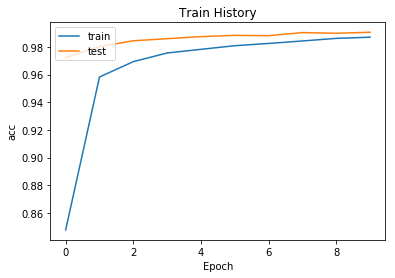

In [31]:
show_train_history(train_history,'acc', 'val_acc')

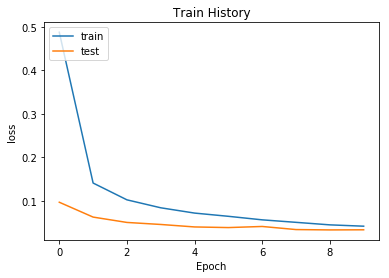

In [32]:
show_train_history(train_history,'loss', 'val_loss')

In [33]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 6s 588us/step


0.99029999999999996

In [34]:
prediction=model.predict_classes(x_Test4D_normalize)

In [35]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [36]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels,
                                 prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" + str(labels[idx])
        if len(prediction) > 0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

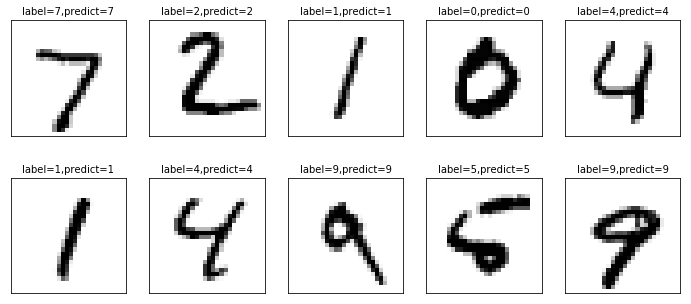

In [37]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [38]:
import pandas as pd
pd.crosstab(y_Test,prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1130,1,0,0,1,1,1,1,0
2,2,1,1026,0,1,0,0,2,0,0
3,0,0,0,1002,0,3,0,3,2,0
4,0,0,0,0,974,0,1,0,1,6
5,1,1,0,6,0,880,2,1,0,1
6,5,3,0,0,1,1,947,0,1,0
7,0,2,4,1,0,0,0,1018,1,2
8,4,0,3,2,1,1,0,2,958,3
